In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("doc.csv")

df["Data_Value"] = df["Data_Value"]/10

df["Year"] = df["Date"].apply(lambda x: x[:4])
df["Day_month"] = df["Date"].apply(lambda x: x[5:])
df = df[df["Day_month"] != "02-29"]

dfmin = df[(df["Element"] == "TMIN") & (df["Year"] < "2015")].sort_values(by=['Date']).rename(columns={"Data_Value":"Tmin"})
dfmax = df[(df["Element"] == "TMAX") & (df["Year"] < "2015")].sort_values(by=['Date']).rename(columns={"Data_Value":"Tmax"})

Tmin = dfmin.groupby("Day_month").agg({"Tmin":np.min})
Tmax = dfmax.groupby("Day_month").agg({"Tmax":np.max})

df2015min = df[(df['Element'] == 'TMIN') & (df['Year'] == '2015')].sort_values(by=['Date'])
df2015max = df[(df['Element'] == 'TMAX') & (df['Year'] == '2015')].sort_values(by=['Date'])

df2015min = df2015min.groupby("Day_month").agg({"Data_Value":np.min})
df2015max = df2015max.groupby("Day_month").agg({"Data_Value":np.max})

record2015min = np.where(df2015min["Data_Value"]<Tmin["Tmin"])
record2015max = np.where(df2015max["Data_Value"]>Tmax["Tmax"])

<IPython.core.display.Javascript object>


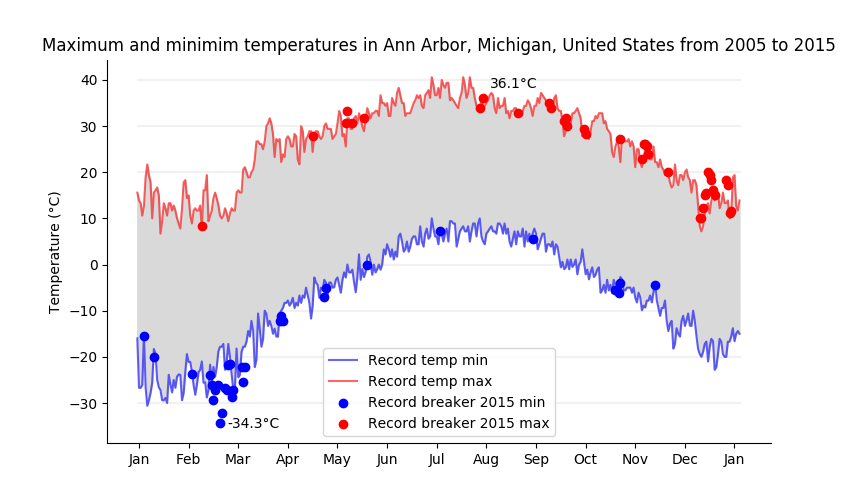

In [2]:
%matplotlib notebook
plt.figure()
plt.hlines([-30,-20,-10,0,10,20,30,40], 0, 365, colors='0.85', alpha=0.35, zorder=0)
plt.plot(Tmin.values,  "b", label="Record temp min", alpha=0.6)
plt.plot(Tmax.values, "r", label="Record temp max", alpha=0.6)

plt.gca().fill_between(range(len(Tmin)), 
                       Tmin["Tmin"], Tmax["Tmax"], 
                       color='0.85')

plt.scatter(record2015min, df2015min.iloc[record2015min], c="blue", label="Record breaker 2015 min")
plt.scatter(record2015max, df2015max.iloc[record2015max], c="red", label="Record breaker 2015 max")

plt.ylabel("Temperature (°C)")
plt.title("Maximum and minimim temperatures in Ann Arbor, Michigan, United States from 2005 to 2015")
plt.legend()
plt.annotate(str(min(df2015min["Data_Value"]))+"°C", (np.where(df2015min["Data_Value"]==min(df2015min["Data_Value"]))[0], min(df2015min["Data_Value"])), xytext=(5, -4), textcoords="offset points")
plt.annotate(str(max(df2015max["Data_Value"]))+"°C", (np.where(df2015max["Data_Value"]==max(df2015max["Data_Value"]))[0], max(df2015max["Data_Value"])), xytext=(5, 7), textcoords="offset points")

plt.gca().spines["right"].set_visible(False)
plt.gca().spines["top"].set_visible(False)

plt.xticks(np.arange(1,365, 30), ('Jan', 'Feb', 'Mar', 'Apr', 'May', "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec", "Jan"))
    
plt.show()